In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import *
from utils.model_utils import *
from utils.train_utils import *
from utils.metrics import *
from utils.visualization import *

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 8
learning_rate = 0.0002
num_classes = 2
model_name = "convnext_tiny"
output_dir = "outputs/models/augmented"
metrics_output_dir = "outputs/plots/augmented"
os.makedirs(output_dir, exist_ok=True)


In [5]:
print("[INFO] Loading augmented datasets...")
train_loader, val_loader, test_loader = load_datasets(
    data_dir=data_dir, batch_size=batch_size, augmentation="augmented"
)
print("[INFO] Augmented datasets loaded successfully!")

2024-12-23 20:36:45,562 - INFO - Loading datasets from wildfire_dataset_scaled with augmentation type 'augmented'.
2024-12-23 20:36:45,562 - INFO - Applying selected augmentations for wildfire scenarios.
2024-12-23 20:36:45,577 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/train
2024-12-23 20:36:45,581 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/val
2024-12-23 20:36:45,584 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/test
2024-12-23 20:36:45,585 - INFO - Datasets initialized. Preparing DataLoaders...
2024-12-23 20:36:45,586 - INFO - Using WeightedRandomSampler for class balancing.
2024-12-23 20:36:45,587 - INFO - Computing class weights from directory: wildfire_dataset_scaled/train
2024-12-23 20:36:45,589 - INFO - Class 'fire' has 730 samples.
2024-12-23 20:36:45,591 - INFO - Class 'nofire' has 1157 samples.
2024-12-23 20:36:45,592 - INFO - Computed class weights: {'fire': 1.0, 'nofire': 

[INFO] Loading augmented datasets...


2024-12-23 20:36:59,304 - INFO - DataLoaders created successfully.


[INFO] Augmented datasets loaded successfully!


In [6]:
# Initialize the model
print(f"\n[INFO] Starting Training for Model: {model_name} with Augmented Data\n")
print(f"[INFO] Initializing {model_name} model...")
model = initialize_model(
    model_name=model_name,
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Baseline augmentation: Freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Training for Model: convnext_tiny with Augmented Data

[INFO] Initializing convnext_tiny model...
[INFO] Model initialized successfully!


In [7]:
# Define loss function and optimizer
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
# Train the model
from torch.optim.lr_scheduler import StepLR

scheduler = StepLR(optimizer, step_size=5, gamma=0.5)

print("[INFO] Starting model training with augmented data...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler, 
    device=device,
    save_path=os.path.join(output_dir, f"{model_name}_augmented.pt"),
    early_stop_patience=14,  # Early stopping patience
    monitor_metric="val_f1"
)
print("[INFO] Training completed successfully!")

[INFO] Starting model training with augmented data...

Starting training...



[INFO] Learning rate adjusted to: 0.000200
[INFO] Best model saved with val_f1: 0.8694
Epoch [1]: Train Loss: 0.6155, Train Acc: 0.7350 | Val Loss: 0.5454, Val Acc: 0.8259, Val Recall: 0.9472, Val F1: 0.8694


[INFO] Learning rate adjusted to: 0.000200
[INFO] Best model saved with val_f1: 0.8797
Epoch [2]: Train Loss: 0.5179, Train Acc: 0.8161 | Val Loss: 0.4717, Val Acc: 0.8408, Val Recall: 0.9512, Val F1: 0.8797


[INFO] Learning rate adjusted to: 0.000200
[INFO] Best model saved with val_f1: 0.8829
Epoch [3]: Train Loss: 0.4590, Train Acc: 0.8357 | Val Loss: 0.4310, Val Acc: 0.8483, Val Recall: 0.9350, Val F1: 0.8829


[INFO] Learning rate adjusted to: 0.000200
[INFO] No improvement in val_f1. Patience: 1/14
Epoch [4]: Train Loss: 0.4421, Train Acc: 0.8325 | Val Loss: 0.4112, Val Acc: 0.8358, Val Recall: 0.9187, Val F1: 0.8726


[INFO] Learning rate adjusted to: 0.000100
[INFO] Best model saved with val_f1: 0.8833
Epoch [5]: Train Loss: 0.4052, Train Acc: 0.8405 | Val Loss: 0.3851, Val Acc: 0.8507, Val Recall: 0.9228, Val F1: 0.8833


[INFO] Learning rate adjusted to: 0.000100
[INFO] Best model saved with val_f1: 0.8837
Epoch [6]: Train Loss: 0.3999, Train Acc: 0.8516 | Val Loss: 0.3802, Val Acc: 0.8507, Val Recall: 0.9268, Val F1: 0.8837


[INFO] Learning rate adjusted to: 0.000100
[INFO] No improvement in val_f1. Patience: 1/14
Epoch [7]: Train Loss: 0.4009, Train Acc: 0.8304 | Val Loss: 0.3756, Val Acc: 0.8458, Val Recall: 0.9268, Val F1: 0.8803


[INFO] Learning rate adjusted to: 0.000100
[INFO] Best model saved with val_f1: 0.8858
Epoch [8]: Train Loss: 0.3841, Train Acc: 0.8442 | Val Loss: 0.3707, Val Acc: 0.8557, Val Recall: 0.9146, Val F1: 0.8858


[INFO] Learning rate adjusted to: 0.000100
[INFO] Best model saved with val_f1: 0.8928
Epoch [9]: Train Loss: 0.3875, Train Acc: 0.8463 | Val Loss: 0.3599, Val Acc: 0.8632, Val Recall: 0.9309, Val F1: 0.8928


[INFO] Learning rate adjusted to: 0.000050
[INFO] No improvement in val_f1. Patience: 1/14
Epoch [10]: Train Loss: 0.3881, Train Acc: 0.8394 | Val Loss: 0.3565, Val Acc: 0.8483, Val Recall: 0.9268, Val F1: 0.8820


[INFO] Learning rate adjusted to: 0.000050
[INFO] No improvement in val_f1. Patience: 2/14
Epoch [11]: Train Loss: 0.3777, Train Acc: 0.8458 | Val Loss: 0.3539, Val Acc: 0.8507, Val Recall: 0.9228, Val F1: 0.8833


[INFO] Learning rate adjusted to: 0.000050
[INFO] No improvement in val_f1. Patience: 3/14
Epoch [12]: Train Loss: 0.3656, Train Acc: 0.8506 | Val Loss: 0.3562, Val Acc: 0.8607, Val Recall: 0.9268, Val F1: 0.8906


[INFO] Learning rate adjusted to: 0.000050
[INFO] Best model saved with val_f1: 0.8992
Epoch [13]: Train Loss: 0.3756, Train Acc: 0.8458 | Val Loss: 0.3468, Val Acc: 0.8706, Val Recall: 0.9431, Val F1: 0.8992


[INFO] Learning rate adjusted to: 0.000050
[INFO] No improvement in val_f1. Patience: 1/14
Epoch [14]: Train Loss: 0.3589, Train Acc: 0.8585 | Val Loss: 0.3521, Val Acc: 0.8607, Val Recall: 0.9309, Val F1: 0.8911


[INFO] Learning rate adjusted to: 0.000025
[INFO] No improvement in val_f1. Patience: 2/14
Epoch [15]: Train Loss: 0.3487, Train Acc: 0.8649 | Val Loss: 0.3446, Val Acc: 0.8682, Val Recall: 0.9390, Val F1: 0.8971


[INFO] Learning rate adjusted to: 0.000025
[INFO] No improvement in val_f1. Patience: 3/14
Epoch [16]: Train Loss: 0.3650, Train Acc: 0.8553 | Val Loss: 0.3425, Val Acc: 0.8706, Val Recall: 0.9350, Val F1: 0.8984


[INFO] Learning rate adjusted to: 0.000025
[INFO] No improvement in val_f1. Patience: 4/14
Epoch [17]: Train Loss: 0.3604, Train Acc: 0.8559 | Val Loss: 0.3491, Val Acc: 0.8582, Val Recall: 0.9187, Val F1: 0.8880


[INFO] Learning rate adjusted to: 0.000025
[INFO] No improvement in val_f1. Patience: 5/14
Epoch [18]: Train Loss: 0.3613, Train Acc: 0.8500 | Val Loss: 0.3489, Val Acc: 0.8657, Val Recall: 0.9309, Val F1: 0.8945


[INFO] Learning rate adjusted to: 0.000025
[INFO] No improvement in val_f1. Patience: 6/14
Epoch [19]: Train Loss: 0.3586, Train Acc: 0.8537 | Val Loss: 0.3457, Val Acc: 0.8657, Val Recall: 0.9268, Val F1: 0.8941


[INFO] Learning rate adjusted to: 0.000013
[INFO] Best model saved with val_f1: 0.9006
Epoch [20]: Train Loss: 0.3506, Train Acc: 0.8606 | Val Loss: 0.3373, Val Acc: 0.8731, Val Recall: 0.9390, Val F1: 0.9006


[INFO] Learning rate adjusted to: 0.000013
[INFO] Best model saved with val_f1: 0.9045
Epoch [21]: Train Loss: 0.3394, Train Acc: 0.8707 | Val Loss: 0.3416, Val Acc: 0.8781, Val Recall: 0.9431, Val F1: 0.9045


[INFO] Learning rate adjusted to: 0.000013
[INFO] No improvement in val_f1. Patience: 1/14
Epoch [22]: Train Loss: 0.3543, Train Acc: 0.8601 | Val Loss: 0.3426, Val Acc: 0.8607, Val Recall: 0.9309, Val F1: 0.8911


[INFO] Learning rate adjusted to: 0.000013
[INFO] No improvement in val_f1. Patience: 2/14
Epoch [23]: Train Loss: 0.3691, Train Acc: 0.8453 | Val Loss: 0.3474, Val Acc: 0.8607, Val Recall: 0.9187, Val F1: 0.8898


[INFO] Learning rate adjusted to: 0.000013
[INFO] No improvement in val_f1. Patience: 3/14
Epoch [24]: Train Loss: 0.3515, Train Acc: 0.8553 | Val Loss: 0.3406, Val Acc: 0.8682, Val Recall: 0.9309, Val F1: 0.8963


[INFO] Learning rate adjusted to: 0.000006
[INFO] No improvement in val_f1. Patience: 4/14
Epoch [25]: Train Loss: 0.3508, Train Acc: 0.8617 | Val Loss: 0.3449, Val Acc: 0.8682, Val Recall: 0.9228, Val F1: 0.8955


[INFO] Learning rate adjusted to: 0.000006
[INFO] No improvement in val_f1. Patience: 5/14
Epoch [26]: Train Loss: 0.3337, Train Acc: 0.8659 | Val Loss: 0.3410, Val Acc: 0.8781, Val Recall: 0.9431, Val F1: 0.9045


[INFO] Learning rate adjusted to: 0.000006
[INFO] No improvement in val_f1. Patience: 6/14
Epoch [27]: Train Loss: 0.3405, Train Acc: 0.8696 | Val Loss: 0.3406, Val Acc: 0.8706, Val Recall: 0.9309, Val F1: 0.8980


[INFO] Learning rate adjusted to: 0.000006
[INFO] No improvement in val_f1. Patience: 7/14
Epoch [28]: Train Loss: 0.3510, Train Acc: 0.8617 | Val Loss: 0.3422, Val Acc: 0.8781, Val Recall: 0.9350, Val F1: 0.9037


[INFO] Learning rate adjusted to: 0.000006
[INFO] No improvement in val_f1. Patience: 8/14
Epoch [29]: Train Loss: 0.3534, Train Acc: 0.8569 | Val Loss: 0.3429, Val Acc: 0.8632, Val Recall: 0.9146, Val F1: 0.8911


[INFO] Learning rate adjusted to: 0.000003
[INFO] No improvement in val_f1. Patience: 9/14
Epoch [30]: Train Loss: 0.3419, Train Acc: 0.8670 | Val Loss: 0.3330, Val Acc: 0.8682, Val Recall: 0.9309, Val F1: 0.8963


[INFO] Learning rate adjusted to: 0.000003
[INFO] Best model saved with val_f1: 0.9048
Epoch [31]: Train Loss: 0.3532, Train Acc: 0.8511 | Val Loss: 0.3336, Val Acc: 0.8806, Val Recall: 0.9268, Val F1: 0.9048


[INFO] Learning rate adjusted to: 0.000003
[INFO] Best model saved with val_f1: 0.9059
Epoch [32]: Train Loss: 0.3313, Train Acc: 0.8712 | Val Loss: 0.3281, Val Acc: 0.8806, Val Recall: 0.9390, Val F1: 0.9059


[INFO] Learning rate adjusted to: 0.000003
[INFO] No improvement in val_f1. Patience: 1/14
Epoch [33]: Train Loss: 0.3524, Train Acc: 0.8543 | Val Loss: 0.3429, Val Acc: 0.8731, Val Recall: 0.9390, Val F1: 0.9006


[INFO] Learning rate adjusted to: 0.000003
[INFO] No improvement in val_f1. Patience: 2/14
Epoch [34]: Train Loss: 0.3571, Train Acc: 0.8532 | Val Loss: 0.3417, Val Acc: 0.8582, Val Recall: 0.9309, Val F1: 0.8893


[INFO] Learning rate adjusted to: 0.000002
[INFO] No improvement in val_f1. Patience: 3/14
Epoch [35]: Train Loss: 0.3544, Train Acc: 0.8543 | Val Loss: 0.3374, Val Acc: 0.8657, Val Recall: 0.9187, Val F1: 0.8933


[INFO] Learning rate adjusted to: 0.000002
[INFO] No improvement in val_f1. Patience: 4/14
Epoch [36]: Train Loss: 0.3516, Train Acc: 0.8569 | Val Loss: 0.3439, Val Acc: 0.8706, Val Recall: 0.9309, Val F1: 0.8980


[INFO] Learning rate adjusted to: 0.000002
[INFO] No improvement in val_f1. Patience: 5/14
Epoch [37]: Train Loss: 0.3486, Train Acc: 0.8617 | Val Loss: 0.3393, Val Acc: 0.8682, Val Recall: 0.9309, Val F1: 0.8963


[INFO] Learning rate adjusted to: 0.000002
[INFO] No improvement in val_f1. Patience: 6/14
Epoch [38]: Train Loss: 0.3521, Train Acc: 0.8532 | Val Loss: 0.3302, Val Acc: 0.8781, Val Recall: 0.9309, Val F1: 0.9034


[INFO] Learning rate adjusted to: 0.000002
[INFO] No improvement in val_f1. Patience: 7/14
Epoch [39]: Train Loss: 0.3360, Train Acc: 0.8665 | Val Loss: 0.3418, Val Acc: 0.8682, Val Recall: 0.9187, Val F1: 0.8950


[INFO] Learning rate adjusted to: 0.000001
[INFO] No improvement in val_f1. Patience: 8/14
Epoch [40]: Train Loss: 0.3540, Train Acc: 0.8537 | Val Loss: 0.3413, Val Acc: 0.8632, Val Recall: 0.9350, Val F1: 0.8932


[INFO] Learning rate adjusted to: 0.000001
[INFO] No improvement in val_f1. Patience: 9/14
Epoch [41]: Train Loss: 0.3396, Train Acc: 0.8617 | Val Loss: 0.3354, Val Acc: 0.8756, Val Recall: 0.9390, Val F1: 0.9023


[INFO] Learning rate adjusted to: 0.000001
[INFO] Best model saved with val_f1: 0.9073
Epoch [42]: Train Loss: 0.3433, Train Acc: 0.8643 | Val Loss: 0.3397, Val Acc: 0.8831, Val Recall: 0.9350, Val F1: 0.9073


[INFO] Learning rate adjusted to: 0.000001
[INFO] No improvement in val_f1. Patience: 1/14
Epoch [43]: Train Loss: 0.3459, Train Acc: 0.8728 | Val Loss: 0.3406, Val Acc: 0.8706, Val Recall: 0.9268, Val F1: 0.8976


[INFO] Learning rate adjusted to: 0.000001
[INFO] No improvement in val_f1. Patience: 2/14
Epoch [44]: Train Loss: 0.3614, Train Acc: 0.8479 | Val Loss: 0.3363, Val Acc: 0.8632, Val Recall: 0.9268, Val F1: 0.8924


[INFO] Learning rate adjusted to: 0.000000
[INFO] No improvement in val_f1. Patience: 3/14
Epoch [45]: Train Loss: 0.3500, Train Acc: 0.8548 | Val Loss: 0.3359, Val Acc: 0.8607, Val Recall: 0.9268, Val F1: 0.8906


[INFO] Learning rate adjusted to: 0.000000
[INFO] No improvement in val_f1. Patience: 4/14
Epoch [46]: Train Loss: 0.3331, Train Acc: 0.8760 | Val Loss: 0.3414, Val Acc: 0.8557, Val Recall: 0.9309, Val F1: 0.8876


[INFO] Learning rate adjusted to: 0.000000
[INFO] No improvement in val_f1. Patience: 5/14
Epoch [47]: Train Loss: 0.3517, Train Acc: 0.8564 | Val Loss: 0.3339, Val Acc: 0.8657, Val Recall: 0.9268, Val F1: 0.8941


[INFO] Learning rate adjusted to: 0.000000
[INFO] No improvement in val_f1. Patience: 6/14
Epoch [48]: Train Loss: 0.3600, Train Acc: 0.8490 | Val Loss: 0.3428, Val Acc: 0.8682, Val Recall: 0.9309, Val F1: 0.8963


[INFO] Learning rate adjusted to: 0.000000
[INFO] No improvement in val_f1. Patience: 7/14
Epoch [49]: Train Loss: 0.3539, Train Acc: 0.8458 | Val Loss: 0.3375, Val Acc: 0.8706, Val Recall: 0.9350, Val F1: 0.8984


[INFO] Learning rate adjusted to: 0.000000
[INFO] No improvement in val_f1. Patience: 8/14
Epoch [50]: Train Loss: 0.3635, Train Acc: 0.8559 | Val Loss: 0.3412, Val Acc: 0.8682, Val Recall: 0.9309, Val F1: 0.8963


[INFO] Learning rate adjusted to: 0.000000
[INFO] No improvement in val_f1. Patience: 9/14
Epoch [51]: Train Loss: 0.3489, Train Acc: 0.8580 | Val Loss: 0.3345, Val Acc: 0.8706, Val Recall: 0.9350, Val F1: 0.8984


[INFO] Learning rate adjusted to: 0.000000
[INFO] No improvement in val_f1. Patience: 10/14
Epoch [52]: Train Loss: 0.3414, Train Acc: 0.8638 | Val Loss: 0.3321, Val Acc: 0.8731, Val Recall: 0.9309, Val F1: 0.8998


[INFO] Learning rate adjusted to: 0.000000
[INFO] No improvement in val_f1. Patience: 11/14
Epoch [53]: Train Loss: 0.3409, Train Acc: 0.8744 | Val Loss: 0.3338, Val Acc: 0.8756, Val Recall: 0.9390, Val F1: 0.9023


[INFO] Learning rate adjusted to: 0.000000
[INFO] No improvement in val_f1. Patience: 12/14
Epoch [54]: Train Loss: 0.3473, Train Acc: 0.8580 | Val Loss: 0.3373, Val Acc: 0.8682, Val Recall: 0.9268, Val F1: 0.8959


[INFO] Learning rate adjusted to: 0.000000
[INFO] No improvement in val_f1. Patience: 13/14
Epoch [55]: Train Loss: 0.3424, Train Acc: 0.8585 | Val Loss: 0.3375, Val Acc: 0.8706, Val Recall: 0.9268, Val F1: 0.8976


[INFO] Learning rate adjusted to: 0.000000
[INFO] No improvement in val_f1. Patience: 14/14
Epoch [56]: Train Loss: 0.3417, Train Acc: 0.8659 | Val Loss: 0.3384, Val Acc: 0.8682, Val Recall: 0.9268, Val F1: 0.8959
[INFO] Final metrics saved to outputs/models/augmented\final_metrics.json
[INFO] Training stopped after 56 epochs. Best val_f1: 0.9073

[INFO] Training completed successfully!


In [9]:
# Evaluate the model
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device,
    model_name=model_name,
    save_base_path=metrics_output_dir + f"/{model_name}_augmented"
)
print(f"\n[INFO] Metrics for {model_name} with Augmented Data:\n{metrics}")

[INFO] Evaluating the model...
[INFO] Evaluation metrics saved to outputs/plots/augmented/convnext_tiny_augmented\convnext_tiny\convnext_tiny_evaluation.json

[INFO] Metrics for convnext_tiny with Augmented Data:
{'classification_report': {'No Fire': {'precision': 0.84375, 'recall': 0.8490566037735849, 'f1-score': 0.8463949843260188, 'support': 159.0}, 'Fire': {'precision': 0.904, 'recall': 0.900398406374502, 'f1-score': 0.9021956087824351, 'support': 251.0}, 'accuracy': 0.8804878048780488, 'macro avg': {'precision': 0.873875, 'recall': 0.8747275050740435, 'f1-score': 0.874295296554227, 'support': 410.0}, 'weighted avg': {'precision': 0.8806347560975609, 'recall': 0.8804878048780488, 'f1-score': 0.8805558544200688, 'support': 410.0}}, 'confusion_matrix': [[135, 24], [25, 226]], 'roc_auc': 0.9437971384900649, 'y_true': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[INFO] Saving training and evaluation results...
[INFO] Training plot saved to outputs/plots/augmented\convnext_tiny_augmented_training_curve.png
[INFO] Confusion matrix saved to outputs/plots/augmented\convnext_tiny_augmented_confusion_matrix.png
[INFO] ROC curve saved to outputs/plots/augmented\convnext_tiny_augmented_roc_curve.png
[INFO] Precision-Recall curve saved to outputs/plots/augmented\convnext_tiny_augmented_precision_recall.png
[INFO] All results saved successfully!


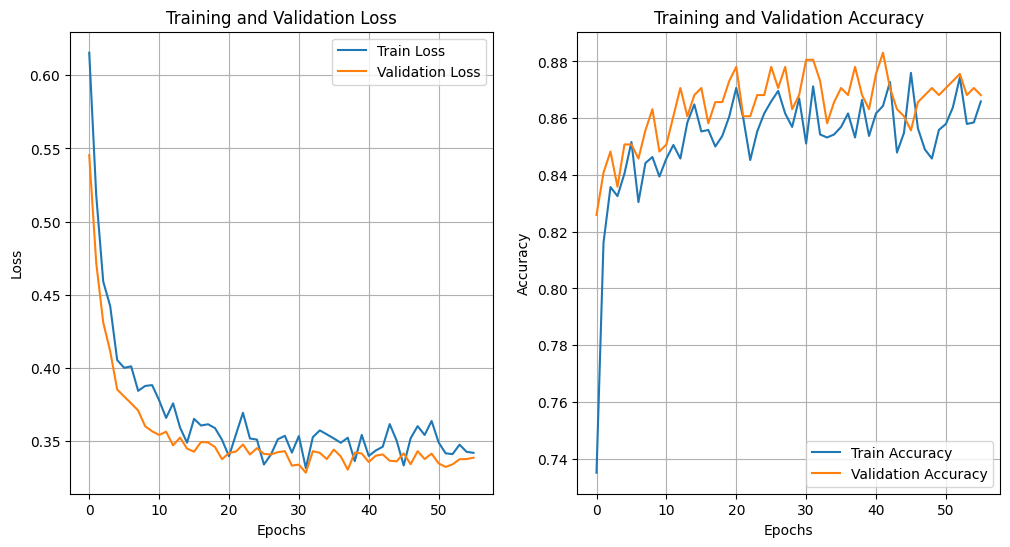

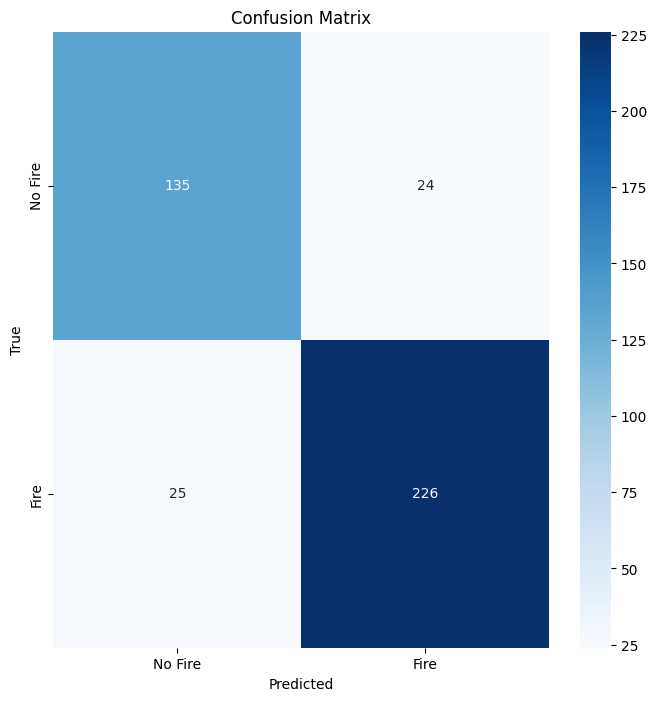

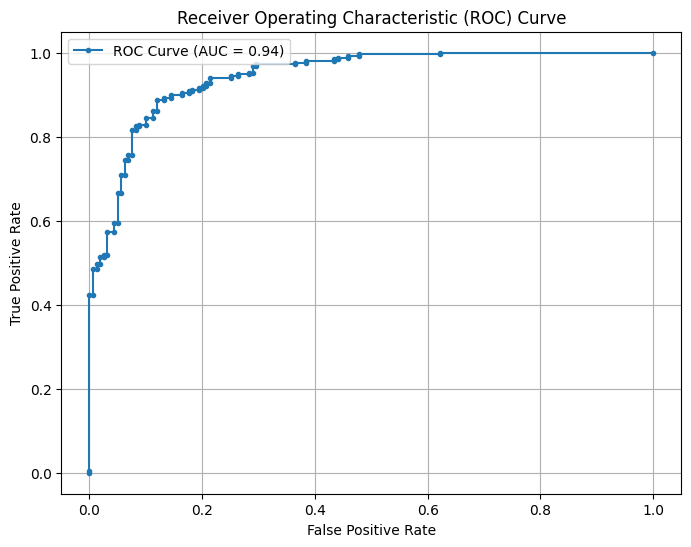

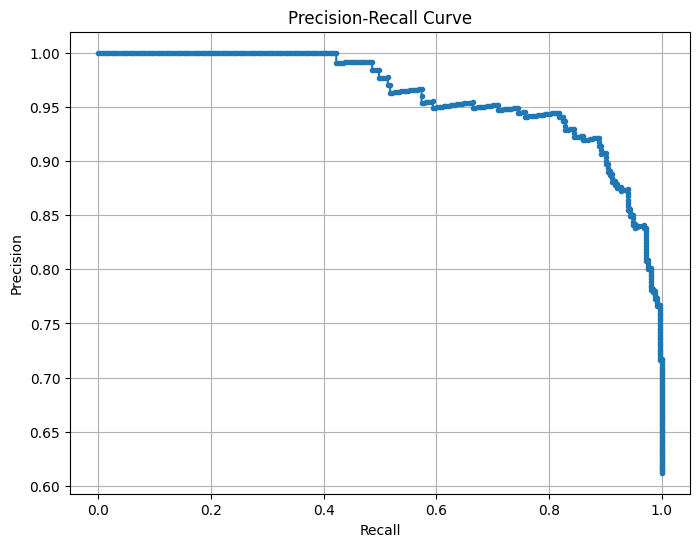

In [10]:
print("[INFO] Saving training and evaluation results...")

# Training curve
plot_training(
    history, output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_training_curve.png")
)

# Confusion matrix
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_confusion_matrix.png")
)

# ROC Curve
plot_roc_curve(
    y_true=metrics["y_true"],
    y_scores=metrics["y_scores"],
    output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_roc_curve.png")
)

# Precision-Recall Curve
plot_precision_recall(
    y_true=metrics["y_true"],
    y_scores=metrics["y_scores"],
    output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_precision_recall.png")
)

print("[INFO] All results saved successfully!")